# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Koca

Student name: Gözdenur
    
ID: 2081380

In [31]:
#load the required packages

%matplotlib inline  

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [32]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [33]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2081380
np.random.seed(ID)

In [34]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [35]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 60 68 70 42 54 67 49 51 84]


In [36]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


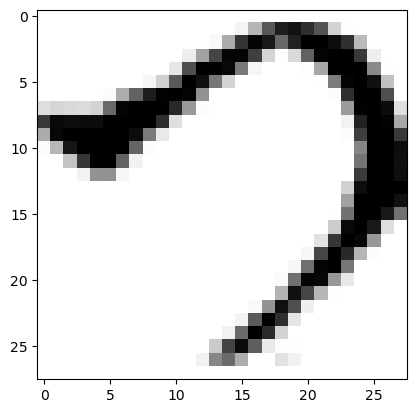

LABEL: 3
INPUT:


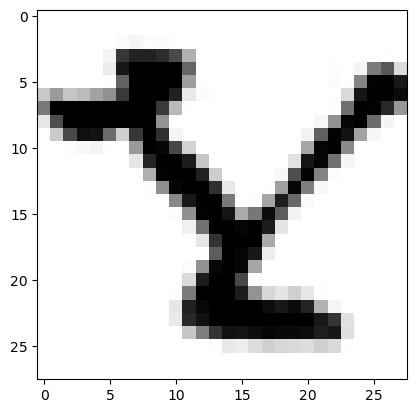

LABEL: 9
INPUT:


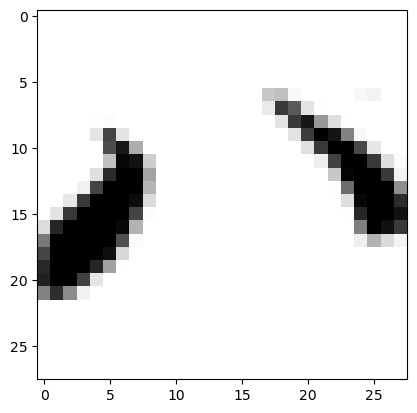

LABEL: 5
INPUT:


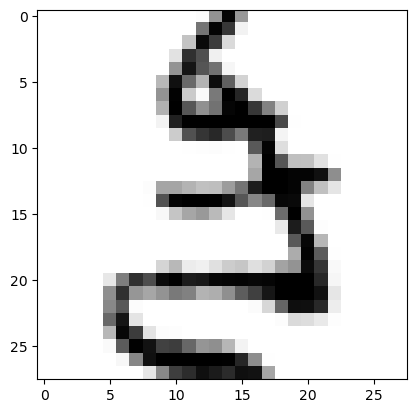

LABEL: 1


In [37]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [38]:
from sklearn import svm
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

svc = svm.SVC(kernel = 'linear')
model = GridSearchCV(svc, parameters)

model.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", model.best_estimator_)

print("Score with best parameters:", model.best_score_)

print("All scores on the grid: \n")
df = pd.DataFrame(model.cv_results_)
df.head()



RESULTS FOR LINEAR KERNEL
Best parameters set found: SVC(C=0.01, kernel='linear')
Score with best parameters: 0.7483333333333333
All scores on the grid: 



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039811,0.007120,0.010399,0.006598,0.01,{'C': 0.01},0.716667,0.758333,0.725000,0.775,0.766667,0.748333,0.023214,1
1,0.040631,0.007647,0.006250,0.007655,0.1,{'C': 0.1},0.741667,0.708333,0.791667,0.725,0.766667,0.746667,0.029627,2
2,0.040669,0.007696,0.006250,0.007655,1,{'C': 1},0.741667,0.708333,0.791667,0.725,0.766667,0.746667,0.029627,2
3,0.040619,0.007650,0.009383,0.007662,10,{'C': 10},0.741667,0.708333,0.791667,0.725,0.766667,0.746667,0.029627,2


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [39]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

svc = SVC(kernel = 'poly', degree = 2)
model = GridSearchCV(svc, parameters)

model.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", model.best_estimator_)

print("Score with best parameters:", model.best_score_)

print("\nAll scores on the grid:")
df = pd.DataFrame(model.cv_results_)
df.head()


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: SVC(C=0.01, degree=2, gamma=1, kernel='poly')
Score with best parameters: 0.7933333333333333

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063043,0.004749,0.011038,0.006212,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.141667,0.133333,0.141667,0.141667,0.141667,0.140000,0.003333,9
1,0.056255,0.007648,0.003126,0.006252,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.741667,0.783333,0.708333,0.766667,0.741667,0.748333,0.025495,6
2,0.062499,0.000004,0.000000,0.000000,0.01,1,"{'C': 0.01, 'gamma': 1}",0.775000,0.791667,0.775000,0.825000,0.800000,0.793333,0.018559,1
3,0.060002,0.007695,0.012502,0.006251,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.433333,0.408333,0.516667,0.391667,0.375000,0.425000,0.049721,8
4,0.050001,0.006250,0.009374,0.007654,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.775000,0.791667,0.775000,0.825000,0.800000,0.793333,0.018559,1


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [40]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

svc = SVC(kernel = 'poly', degree = 3)
model = GridSearchCV(svc, parameters)

model.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE =', degree, ' KERNEL')

print("Best parameters set found:", model.best_estimator_)

print("Score with best parameters:", model.best_score_)

print("\nAll scores on the grid:")
df = pd.DataFrame(model.cv_results_)
df.head()


RESULTS FOR POLY DEGREE = 3  KERNEL
Best parameters set found: SVC(C=0.01, gamma=1, kernel='poly')
Score with best parameters: 0.745

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066692,0.006079,0.012490,0.006245,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.141667,0.133333,0.141667,0.141667,0.141667,0.140000,0.003333,9
1,0.064003,0.006138,0.009133,0.005951,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.733333,0.750000,0.683333,0.708333,0.758333,0.726667,0.027588,6
2,0.068469,0.007325,0.006251,0.007656,0.01,1,"{'C': 0.01, 'gamma': 1}",0.733333,0.766667,0.700000,0.750000,0.775000,0.745000,0.026667,1
3,0.065249,0.003333,0.012501,0.006251,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.375000,0.316667,0.383333,0.333333,0.333333,0.348333,0.026034,8
4,0.053129,0.007651,0.009380,0.007659,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.733333,0.766667,0.700000,0.750000,0.775000,0.745000,0.026667,1


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [41]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

svc = SVC(kernel = 'rbf')
model = GridSearchCV(svc, parameters)

model.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", model.best_estimator_)

print("Score with best parameters:", model.best_score_)

print("\nAll scores on the grid:")
df = pd.DataFrame(model.cv_results_)
df.head()


RESULTS FOR rbf KERNEL
Best parameters set found: SVC(C=10, gamma=0.01)
Score with best parameters: 0.8166666666666667

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064746,0.004326,0.028127,0.006252,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.141667,0.133333,0.141667,0.141667,0.141667,0.140000,0.003333,11
1,0.063666,0.002330,0.027020,0.006081,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.183333,0.183333,0.233333,0.216667,0.175000,0.198333,0.022608,7
2,0.076490,0.002368,0.024749,0.007457,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.141667,0.133333,0.141667,0.141667,0.141667,0.140000,0.003333,11
3,0.078149,0.000046,0.018753,0.006248,0.1,1,"{'C': 0.1, 'gamma': 1}",0.141667,0.133333,0.141667,0.141667,0.141667,0.140000,0.003333,11
4,0.050007,0.006246,0.030251,0.002001,1,0.001,"{'C': 1, 'gamma': 0.001}",0.550000,0.608333,0.616667,0.616667,0.558333,0.590000,0.029533,6


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

## Q1 Answer:

When I compare the performances of the different types of kernels according to the models, I see that linear kernel has the lowest accuracy. Polynomial kernel has better accuracy comparing to linear kernel. But in polynomial kernel, degree has also an important effect. 

Since both poly kernel with degree=3 and degree=2 has same values for gamma and C parameters, and has the same dataset, I can make comment on the effect of degree on the accuracy level of the model. When I increase the degree of the poly kernel, it's accuracy gets a little bit lower. 

Rbf kernel has the better accuracy among all. But it also used different values for parameters C and gamma. While both linear and poly kernel used C=0.01 and both poly kernels used gamma=1 as best parameters, rbf kernel has C=10 and gamma=0.01 as best parameters. Also, the fitting time of rbf is higher comparing the other three models. 

## TO DO 5
Report here the best SVM kernel and parameters

In [42]:
#get training and test error for the best SVM model from CV
#rbf has the best score, so I just used model.best_estimator that is defined by rbf at last at the previous step
best_SVM = model.best_estimator_
best_SVM.fit(X_train,y_train)

# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


Best SVM training error: 0.000000
Best SVM test error: 0.185500


In [43]:
print(best_SVM.kernel) 
print('best_params: ', best_SVM)

rbf
best_params:  SVC(C=10, gamma=0.01)


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [44]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[  0.     0.     0.     0.01   0.1    1.    10.   100.  ]


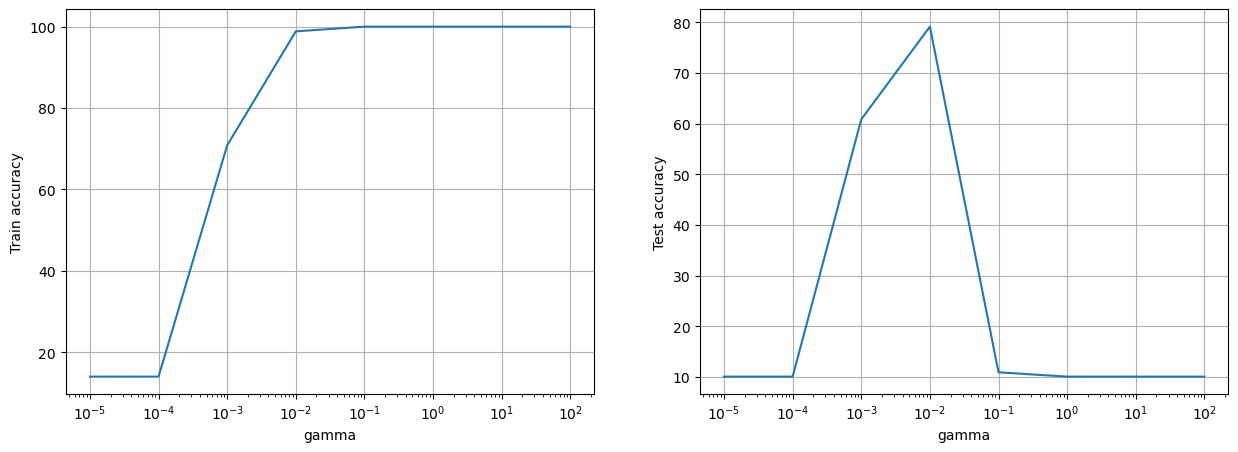

In [45]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []


# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA

for gamma in gamma_values:

    svc = SVC(kernel = 'rbf', C = 1, gamma = gamma)
    svc.fit(X_train, y_train)
    
    accuracy_train = svc.score(X_train, y_train)*100
    train_acc_list.append(accuracy_train)
    
    accuracy_test = svc.score(X_test, y_test)*100
    test_acc_list.append(accuracy_test)

# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

In [46]:
print("training accuracy: \n", train_acc_list)
print("test accuracy: \n", test_acc_list)

training accuracy: 
 [14.000000000000002, 14.000000000000002, 70.83333333333334, 98.83333333333333, 100.0, 100.0, 100.0, 100.0]
test accuracy: 
 [10.075000000000001, 10.075000000000001, 60.85, 79.14999999999999, 10.925, 10.075000000000001, 10.075000000000001, 10.075000000000001]


## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## Q2 Answer:

As the gamma value increases, the accuracy is increasing for both training and test acurracies. But the test accuracy starts decreasing after some point (1.e-02) while training accuracy doesn't decrease. This is the sign of overfitting. In an overfitting case, the model learns the training data so well, and when it comes to the test data, it fails. Because it perfectly memorizes the training data, and when given new data which the model never seen before (test data), it fails. 

According to the train and test accuracy graphs, the best value of gamma can be 1.e-02. Because at this point, both the train and test accuracy are at their best values. 


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [47]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [193 198 193 193 197 228 200 170 202 226]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [48]:
#get training and test error for the best SVM model from CV
best_params = {'C': [10],'gamma':[0.01]}

svc = SVC(kernel = 'rbf')
model = GridSearchCV(svc, best_params)
model.fit(X_train, y_train)

training_error = 1 - model.score(X_train, y_train)
test_error = 1 - model.score(X_test, y_test)
y_pred_svm = model.predict(X_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.115293


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [49]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000)
lr.fit(X_train, y_train)

training_error = 1 - lr.score(X_train, y_train)
test_error = 1 - lr.score(X_test, y_test)
y_pred_lr = lr.predict(X_test)


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.282034


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 9 Try  with regularization (use C=1)¶

In [50]:
lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)

training_error = 1 - lr.score(X_train, y_train)
test_error = 1 - lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.001500
Best logistic regression test error: 0.260069


C:\Users\gozde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

## Question 3 Answer:

1. The best values for svm are C=10 and gamma = 0.01. 
    
    For the svm with m=600: the best svm training error=0, the best svm test error=0.115293. 
    
    For the svm with m=2000: the best svm training error=0, the best svm test error=0.113534
    
    It seems like there is not much difference when used more data. Just the test error is decreasing slightly, but not very noticable. And the training error is 0 for both. This is because the parameter C is so high. I also tried it with C=1 with the hope of seeing the difference in training error more clear.
    
    The results with C=1:
    
    For the svm with m=600: the best svm training error=0.0225, the best svm test error=0.131448 
    
    For the svm with m=2000: the best svm training error=0.0255, the best svm test error=0.127914
    
    In here, there is also not a noticable difference with the change of the training data points. But, the training data is increased slighty, and the test data is decreased slightly  when m is increased. Both are not very noticable. 
    
    
    
    

2. Just for comparison, I also used C=10 in the logistic regression without regularization part. The results of SVM and Lr for C=10:
    
    Best SVM training error: 0.000000
    Best SVM test error: 0.113328
    
    Best logistic regression training error: 0.000000
    Best logistic regression test error: 0.260690
    
    In both of them, the training erro is 0, probably due to the parameter C being high. Comparing the test error, SVM has a better performance since its test error is lower. 

    So, I can say that the accuracy is higher with svm comparing with logistic regression. 
    
   The results of SVM and Lr for C=1: 
   
    Best SVM training error: 0.0255
    Best SVM test error: 0.127914
  
    Best logistic regression training error: 0.001500
    Best logistic regression test error: 0.246983
    
    In the case of C=1, the training error for both svm and lr is really low, but svm has higher error. When it comes to test error, this time lr has higher error. 
    

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [59]:
model = LogisticRegression(C=1).fit(X_train,y_train)
y_pred = model.predict(X_test)
misclassified_samples_lr = np.nonzero(y_pred_lr != list(y_test))[0]
misclassified_samples_lr

C:\Users\gozde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([    0,     2,     8, ..., 57993, 57997, 57998], dtype=int64)

In [60]:
model = SVC(C=1).fit(X_train,y_train)
y_pred = model.predict(X_test)
classified_samples_svm = np.nonzero(y_pred_svm == list(y_test))[0]
classified_samples_svm 


array([    0,     3,     4, ..., 57996, 57998, 57999], dtype=int64)

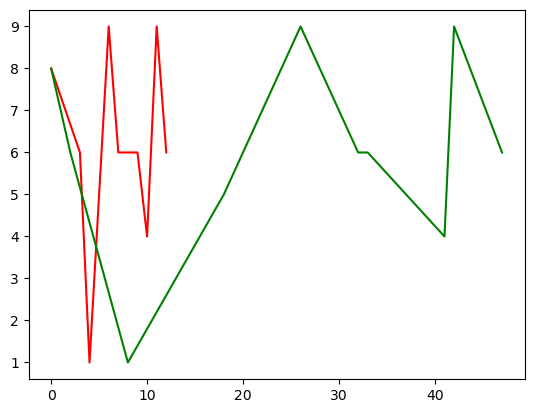

In [65]:
import matplotlib.pyplot as plt
plt.plot(classified_samples_svm[:10], y_test[:10], color='r')
plt.plot(misclassified_samples_lr[:10], y_test[:10], color='g')

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [29]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, y_pred_svm)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  confusion_matrix(y_test, y_pred_lr)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5807 5802 5807 5807 5803 5772 5800 5830 5798 5774]

 Confusion matrix SVM  
 
 [[5317    8    6   36   83   65    5   99  127   61]
 [  11 5042  130   70  150   23  140    5  127  104]
 [   0   94 4771  145   98   52  309   19  203  116]
 [  11   38   95 5379   44  116   10   26   84    4]
 [ 215   66   88   63 5014   23   91   25   91  127]
 [  30   39  147  207   55 5168   31   18   60   17]
 [   9   92  288   67  199   16 4994   66   57   12]
 [  37   21   63   59  181   47   71 5176  114   61]
 [  27  120  108   69   18   70  151    4 5197   34]
 [  10  112  165   18   95   15    7    9   88 5255]]

 Confusion matrix SVM (normalized)   
 
 [[0.92 0.   0.   0.01 0.01 0.01 0.   0.02 0.02 0.01]
 [0.   0.87 0.02 0.01 0.03 0.   0.02 0.   0.02 0.02]
 [0.   0.02 0.82 0.02 0.02 0.01 0.05 0.   0.03 0.02]
 [0.   0.01 0.02 0.93 0.01 0.02 0.   0.   0.01 0.  ]
 [0.04 0.01 0.02 0.01 0.86 0.   0.02 0.   0.02 0.02]
 [0.01 0.01 0.03 0.04 0.01 0.9  0.01 0.   0.0

In [30]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
print("normalized lr: \n", confusion_SVM /counts[:,None])
print("\n normalized svm: \n", confusion_LR /counts[:,None] )

normalized lr: 
 [[0.92 0.   0.   0.01 0.01 0.01 0.   0.02 0.02 0.01]
 [0.   0.87 0.02 0.01 0.03 0.   0.02 0.   0.02 0.02]
 [0.   0.02 0.82 0.02 0.02 0.01 0.05 0.   0.03 0.02]
 [0.   0.01 0.02 0.93 0.01 0.02 0.   0.   0.01 0.  ]
 [0.04 0.01 0.02 0.01 0.86 0.   0.02 0.   0.02 0.02]
 [0.01 0.01 0.03 0.04 0.01 0.9  0.01 0.   0.01 0.  ]
 [0.   0.02 0.05 0.01 0.03 0.   0.86 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.01 0.03 0.01 0.01 0.89 0.02 0.01]
 [0.   0.02 0.02 0.01 0.   0.01 0.03 0.   0.9  0.01]
 [0.   0.02 0.03 0.   0.02 0.   0.   0.   0.02 0.91]]

 normalized svm: 
 [[0.81 0.   0.01 0.01 0.04 0.03 0.   0.03 0.01 0.05]
 [0.   0.68 0.05 0.03 0.05 0.02 0.06 0.   0.05 0.05]
 [0.   0.05 0.6  0.04 0.05 0.04 0.08 0.01 0.08 0.05]
 [0.01 0.02 0.03 0.75 0.03 0.06 0.01 0.02 0.05 0.01]
 [0.05 0.03 0.05 0.04 0.67 0.01 0.05 0.02 0.01 0.07]
 [0.02 0.02 0.04 0.05 0.02 0.78 0.03 0.02 0.02 0.01]
 [0.   0.05 0.1  0.04 0.05 0.02 0.68 0.02 0.04 0.01]
 [0.01 0.   0.04 0.03 0.04 0.02 0.04 0.77 0.03 0.03]
 [0.01 0

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


# Question 4 Answers:
Confusion matrix shows the data that is correctly classified and misclassified. For the 1st column, the intersection with the first row shows the correctly classified data. So, if we look at confusion matrix svm, the data in the first column is correctly classified 5298 times. And it is misclassified as the data (image for our case) in the row 2 for 17 times and as the data in the row 5 for 219 times.

For the second column, we need to look at the intersection of the second column and second row in order to see the correctly classified data. So, the image in the second row is correctly classified 4884 times. And the image in the second row misclassified as the image at third row 85 times and so on. So, to see the correctly classified values, we need to look at the diagonal of the matrix. 

Some images are more correctly classified comparing the others (have higher accuracy). The reason for that might be about the shape of the image. What I mean by that is that if the images (letters) in the second column and fifth column look alike, the model might get confuse and misclassified these letters. Also, it might be related to the training phase. The model might not learn well the letters and have errors. 